<a href="https://colab.research.google.com/github/Binho-do-Boa/Atividades_UFMT/blob/main/Dados_MT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercicio Dados MT

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('matogrosso.csv')
df.head(10)


,NOME_MUNICIPIO,CODIGO,GENTILICO,PREFEITO2017,AREA,POPESTIMADA,DENSIDADE,ESCOLARIZACAO,IDHM,MORTALIDADE,RECEITAS,DESPESAS,PIB
0,Acorizal,5100102,acorizano,CLODOALDO MONTEIRO DA SILVA,1014.029,5424,6.56,96.6,0.628,16.13,NaN,NaN,13362.95
1,Água Boa,5100201,água-boense,MAURO ROSA DA SILVA,7510.635,25229,2.79,99.2,0.729,10.23,92166.40674,81874.15633,37449.63
2,Alta Floresta,5100250,alta-florestense,ASIEL BEZERRA DE ARAUJO,8953.191,51615,5.48,98.0,0.714,19.19,146439.79095,118288.01810,31623.80
3,Alto Araguaia,5100300,araguaiano,GUSTAVO DE MELO ANICEZIO,5399.326,18703,2.84,96.7,0.704,9.09,63035.52537,55216.26966,50298.54
4,Alto Boa Vista,5100359,alto boa vistense,VALTUIR CANDIDO DA SILVA,2240.438,6659,2.34,96.8,0.651,37.04,23227.72780,20002.89582,16877.29
5,Alto Garças,5100409,alto-garcense,CLAUDINEI SINGOLANO,3865.971,11868,2.76,98.0,0.701,13.99,34498.41259,33495.48719,51515.18
6,Alto Paraguai,5100508,alto-paraguaiense,DIANE VIEIRA VASCONCELOS ALVES,1844.817,11238,5.45,95.4,0.638,10.64,21877.67692,20862.93110,10060.57
7,Alto Taquari,5100607,taquariense,FÁBIO MAURI GARBUGIO,1440.399,10557,5.70,98.3,0.705,6.13,53111.83829,42129.43950,104237.70
8,Apiacás,5100805,apiacaense,ADALTO JOSE ZAGO,20493.065,9979,0.42,95.0,0.675,7.81,37080.76693,29954.72985,13872.22
9,Araguaiana,5101001,araguaianense,GETULIO DUTRA VIEIRA NETO,6422.966,3119,0.50,98.3,0.687,34.48,20686.02484,18850.71333,23880.40


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NOME_MUNICIPIO  141 non-null    object 
 1   CODIGO          141 non-null    int64  
 2   GENTILICO       141 non-null    object 
 3   PREFEITO2017    141 non-null    object 
 4   AREA            141 non-null    float64
 5   POPESTIMADA     141 non-null    int64  
 6   DENSIDADE       141 non-null    float64
 7   ESCOLARIZACAO   141 non-null    float64
 8   IDHM            141 non-null    float64
 9   MORTALIDADE     141 non-null    object 
 10  RECEITAS        139 non-null    float64
 11  DESPESAS        139 non-null    float64
 12  PIB             141 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 14.4+ KB


In [26]:
df.count()

NOME_MUNICIPIO    141
CODIGO            141
GENTILICO         141
PREFEITO2017      141
AREA              141
POPESTIMADA       141
DENSIDADE         141
ESCOLARIZACAO     141
IDHM              141
MORTALIDADE       141
RECEITAS          139
DESPESAS          139
PIB               141
dtype: int64

In [27]:
valores_nulos = df.isnull().sum()
print(valores_nulos)

NOME_MUNICIPIO    0
CODIGO            0
GENTILICO         0
PREFEITO2017      0
AREA              0
POPESTIMADA       0
DENSIDADE         0
ESCOLARIZACAO     0
IDHM              0
MORTALIDADE       0
RECEITAS          2
DESPESAS          2
PIB               0
dtype: int64


In [28]:
# Remover valores não numéricos da coluna MORTALIDADE
df['MORTALIDADE'] = pd.to_numeric(df['MORTALIDADE'], errors='coerce')

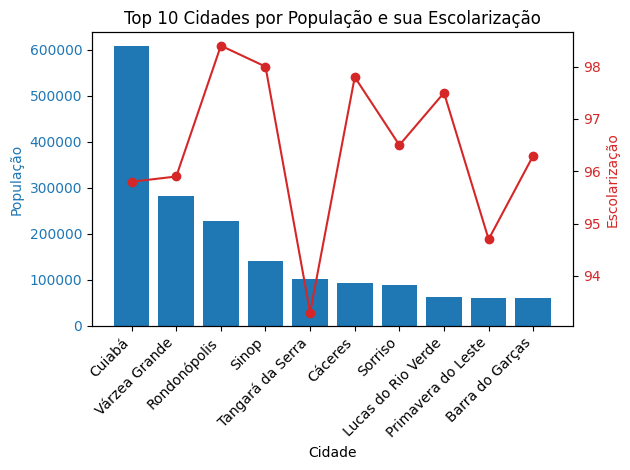

In [41]:
# Selecionar as colunas relevantes para a análise
colunas_relevantes = ['NOME_MUNICIPIO', 'POPESTIMADA', 'ESCOLARIZACAO']
dados_selecionados = df[colunas_relevantes]

# Obter as 10 cidades com maior população
top_10_cidades = dados_selecionados.nlargest(10, 'POPESTIMADA')

# Criar o gráfico de barras
fig, ax1 = plt.subplots()

# Gráfico de barras para população
color = 'tab:blue'
ax1.set_xlabel('Cidade')
ax1.set_ylabel('População', color=color)
ax1.bar(top_10_cidades['NOME_MUNICIPIO'], top_10_cidades['POPESTIMADA'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45, ha='right')

# Adicionar um segundo eixo y para a escolarização
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Escolarização', color=color)
ax2.plot(top_10_cidades['NOME_MUNICIPIO'], top_10_cidades['ESCOLARIZACAO'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Título do gráfico
plt.title('Top 10 Cidades por População e sua Escolarização')

# Exibir o gráfico
fig.tight_layout()
plt.show()

In [42]:
import matplotlib.pyplot as plt # Import the matplotlib library

# Função para plotar gráficos das top 10 cidades
def plot_top_10(df, column, title, ylabel, ascending=False):
    top_10 = df.nlargest(10, column) if not ascending else df.nsmallest(10, column)
    plt.figure(figsize=(12, 6))
    plt.bar(top_10['NOME_MUNICIPIO'], top_10[column], color='blue')
    plt.xticks(rotation=90)
    plt.title(f'Top 10 Cidades - {title}')
    plt.xlabel('Município')
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()


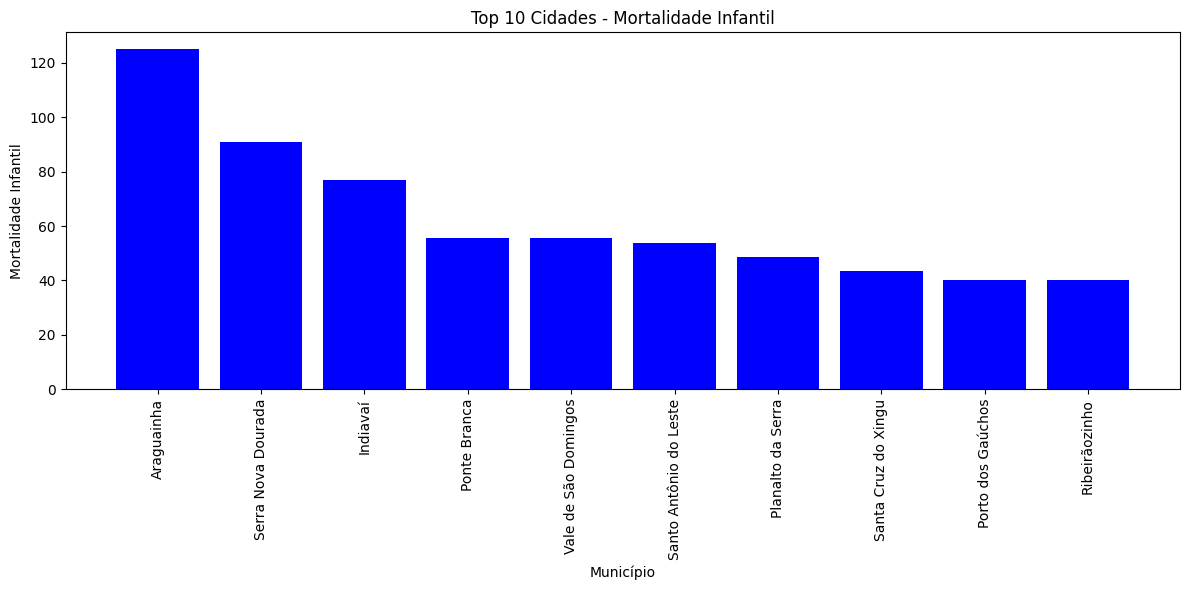

In [43]:
# Gráfico das 10 cidades com maior Mortalidade Infantil
plot_top_10(df, 'MORTALIDADE', 'Mortalidade Infantil', 'Mortalidade Infantil')

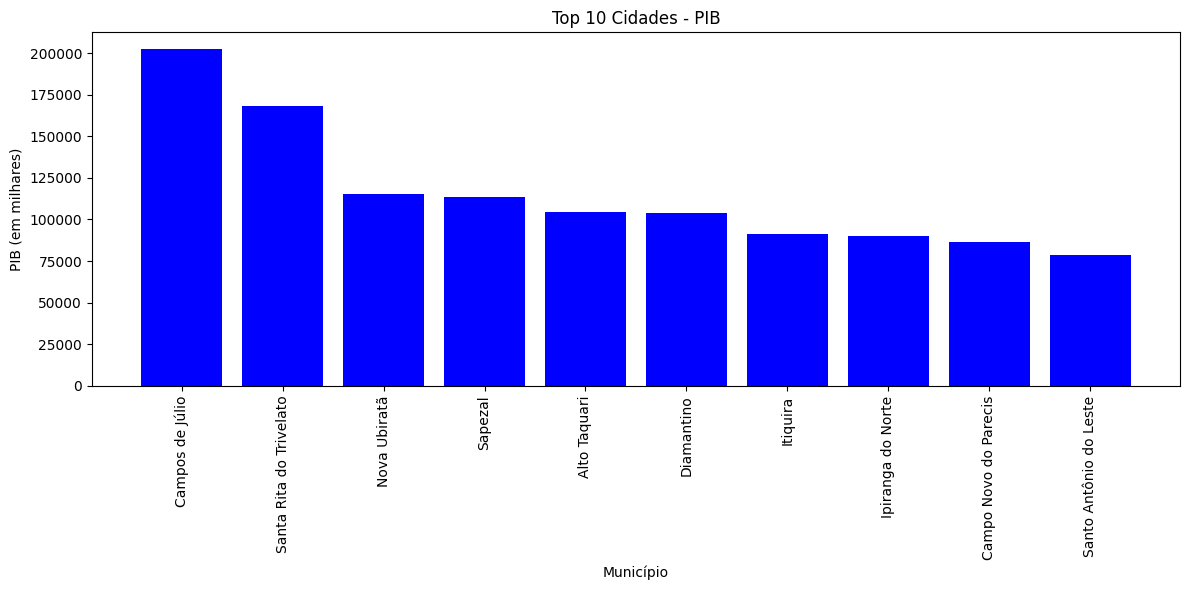

In [44]:
# Gráfico das 10 cidades com maior PIB
plot_top_10(df, 'PIB', 'PIB', 'PIB (em milhares)')

In [48]:
# Qual a média da área das cidades?
media_area = round(df['AREA'].mean(),2)
print(f"Média da área das cidades: {media_area}")

Média da área das cidades: 6405.72


In [51]:
 #Qual a cidade com a menor população?
cidade_menor_populacao = df.loc[df['POPESTIMADA'].idxmin()]
print(f"Cidade com a menor população: {cidade_menor_populacao['NOME_MUNICIPIO']}")


Cidade com a menor população: Araguainha


In [52]:
# Qual a cidade com o maior IDHM?
cidade_maior_idhm = df.loc[df['IDHM'].idxmax()]
print(f"Cidade com o maior IDHM: {cidade_maior_idhm['NOME_MUNICIPIO']}")

Cidade com o maior IDHM: Cuiabá


In [56]:
# Liste os prefeitos das 10 cidades com PIB maior que 100.000 em ordem do maior para menor PIB
cidades_maior_pib = df[df['PIB'] > 100000].sort_values(by='PIB', ascending=False).head(10)
prefeitos_cidades_maior_pib = cidades_maior_pib[['NOME_MUNICIPIO', 'PREFEITO2017', 'PIB']]
print("Prefeitos das cidades com PIB maior que 100.000 em ordem ):")
print(prefeitos_cidades_maior_pib)


Prefeitos das cidades com PIB maior que 100.000 em ordem ):
              NOME_MUNICIPIO                    PREFEITO2017        PIB
23           Campos de Júlio              JOSE ODIL DA SILVA  202309.42
117  Santa Rita do Trivelato                    EGON HOEPERS  167966.16
79              Nova Ubiratã        VALDENIR JOSE DOS SANTOS  115474.99
122                  Sapezal               VALCIR CASAGRANDE  113763.91
7               Alto Taquari            FÁBIO MAURI GARBUGIO  104237.70
40                Diamantino  EDUARDO CAPISTRANO DE OLIVEIRA  104092.58


In [61]:
# Coluna SALDO que é o resultado de RECEITAS - DESPESAS
df['SALDO'] = df['RECEITAS'] - df['DESPESAS']

# Mostra as 10 primeira linhas
df.head(10)

,NOME_MUNICIPIO,CODIGO,GENTILICO,PREFEITO2017,AREA,POPESTIMADA,DENSIDADE,ESCOLARIZACAO,IDHM,MORTALIDADE,RECEITAS,DESPESAS,PIB,SALDO
0,Acorizal,5100102,acorizano,CLODOALDO MONTEIRO DA SILVA,1014.029,5424,6.56,96.6,0.628,16.13,NaN,NaN,13362.95,NaN
1,Água Boa,5100201,água-boense,MAURO ROSA DA SILVA,7510.635,25229,2.79,99.2,0.729,10.23,92166.40674,81874.15633,37449.63,10292.25041
2,Alta Floresta,5100250,alta-florestense,ASIEL BEZERRA DE ARAUJO,8953.191,51615,5.48,98.0,0.714,19.19,146439.79095,118288.01810,31623.80,28151.77285
3,Alto Araguaia,5100300,araguaiano,GUSTAVO DE MELO ANICEZIO,5399.326,18703,2.84,96.7,0.704,9.09,63035.52537,55216.26966,50298.54,7819.25571
4,Alto Boa Vista,5100359,alto boa vistense,VALTUIR CANDIDO DA SILVA,2240.438,6659,2.34,96.8,0.651,37.04,23227.72780,20002.89582,16877.29,3224.83198
5,Alto Garças,5100409,alto-garcense,CLAUDINEI SINGOLANO,3865.971,11868,2.76,98.0,0.701,13.99,34498.41259,33495.48719,51515.18,1002.92540
6,Alto Paraguai,5100508,alto-paraguaiense,DIANE VIEIRA VASCONCELOS ALVES,1844.817,11238,5.45,95.4,0.638,10.64,21877.67692,20862.93110,10060.57,1014.74582
7,Alto Taquari,5100607,taquariense,FÁBIO MAURI GARBUGIO,1440.399,10557,5.70,98.3,0.705,6.13,53111.83829,42129.43950,104237.70,10982.39879
8,Apiacás,5100805,apiacaense,ADALTO JOSE ZAGO,20493.065,9979,0.42,95.0,0.675,7.81,37080.76693,29954.72985,13872.22,7126.03708
9,Araguaiana,5101001,araguaianense,GETULIO DUTRA VIEIRA NETO,6422.966,3119,0.50,98.3,0.687,34.48,20686.02484,18850.71333,23880.40,1835.31151


In [68]:
# Qual a cidade com o maior AREA?
cidade_maior_area = df.loc[df['AREA'].idxmax()]
print(f"Cidade com o Maior ÁREA: {cidade_maior_area['NOME_MUNICIPIO']}")

Cidade com o Maior ÁREA: Colniza


In [69]:
# Qual a cidade com o Menor AREA?
cidade_maior_area = df.loc[df['AREA'].idxmin()]
print(f"Cidade com o Menor ÁREA: {cidade_maior_area['NOME_MUNICIPIO']}")

Cidade com o Menor ÁREA: São Pedro da Cipa
